In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_encoding as spc

In [2]:
df = pd.read_csv("../data/api_rent_madrid_extract_sin_nulos.csv", index_col = 0, sep=";").reset_index(drop=True)
df.head(1)

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea
0,750.0,flat,rent,60.0,True,1,1,Madrid,good,False,3,Hortaleza,Canillas,True,Unknown,flat,Unknown,13.0


In [3]:
df['exterior'] = df['exterior'].astype(object)

In [4]:
df.dtypes

price              float64
propertyType        object
operation           object
size               float64
exterior            object
rooms                int64
bathrooms            int64
municipality        object
status              object
newDevelopment      object
floor               object
district            object
neighborhood        object
hasLift             object
hasParkingSpace     object
typology            object
subTypology         object
priceByArea        float64
dtype: object

In [5]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ

['propertyType',
 'operation',
 'exterior',
 'municipality',
 'status',
 'newDevelopment',
 'floor',
 'district',
 'neighborhood',
 'hasLift',
 'hasParkingSpace',
 'typology',
 'subTypology']

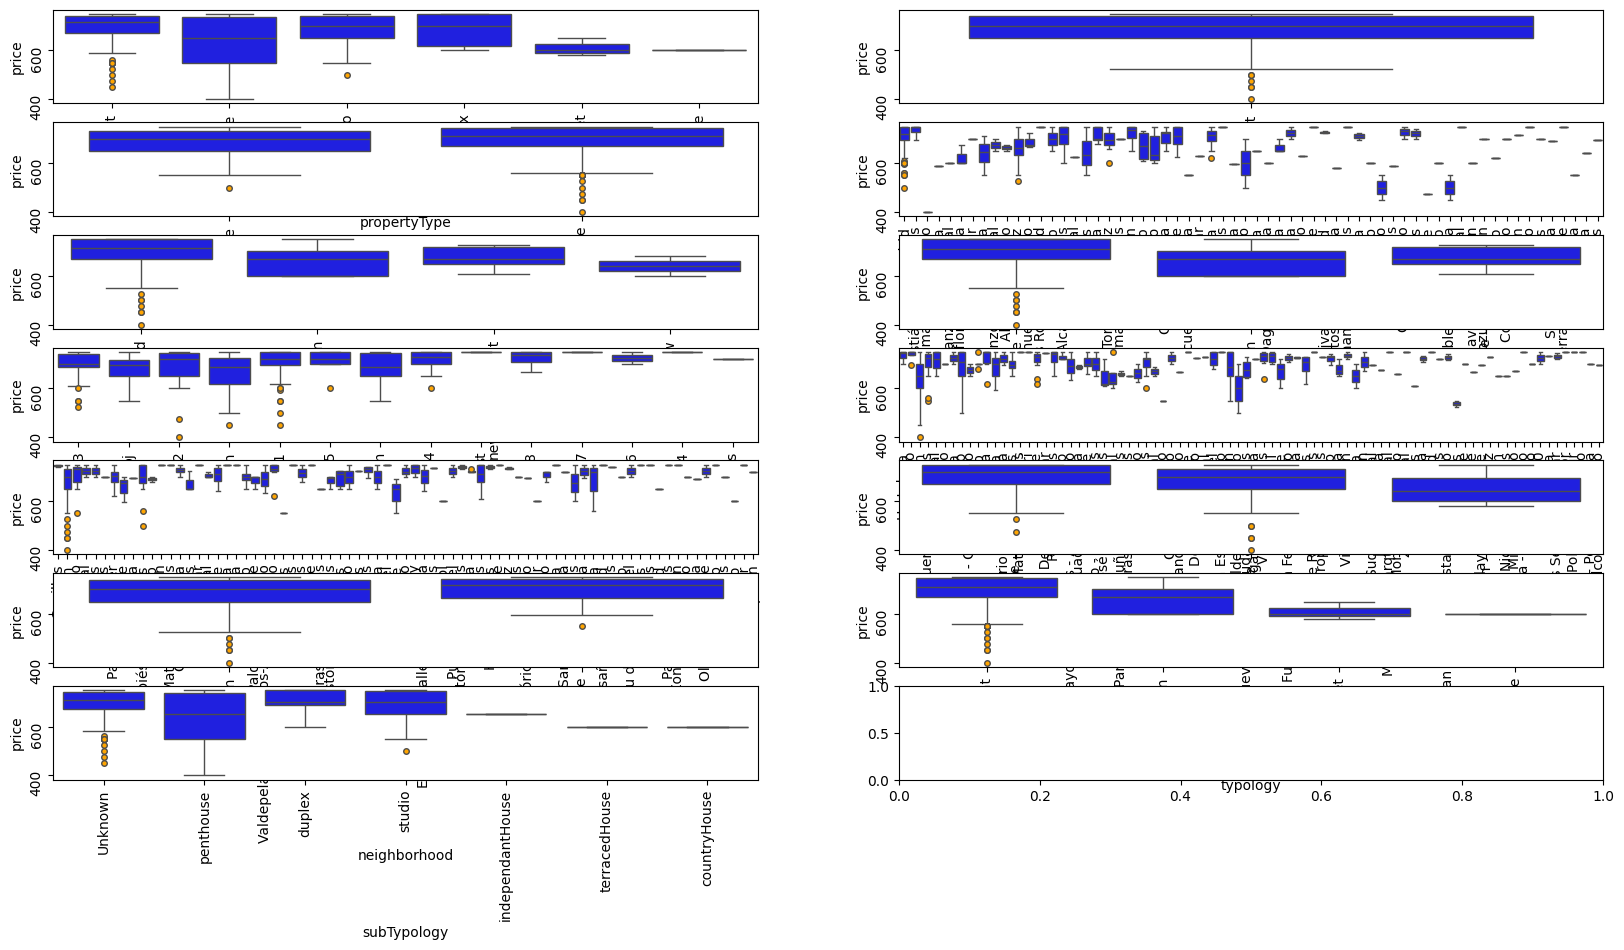

In [6]:
# # instanciamos la clase de Encoding
analisis_encoding = spc.Analisis_Visual_Encoding(variable_respuesta = "price", dataframe = df, lista_variables_categorias = lista_col_categ)

# # llamamos al método para hacer las gráficas
analisis_encoding.crear_boxplot()

**No nos muestra informacion que podamos entender claramente, seguimos explorando**

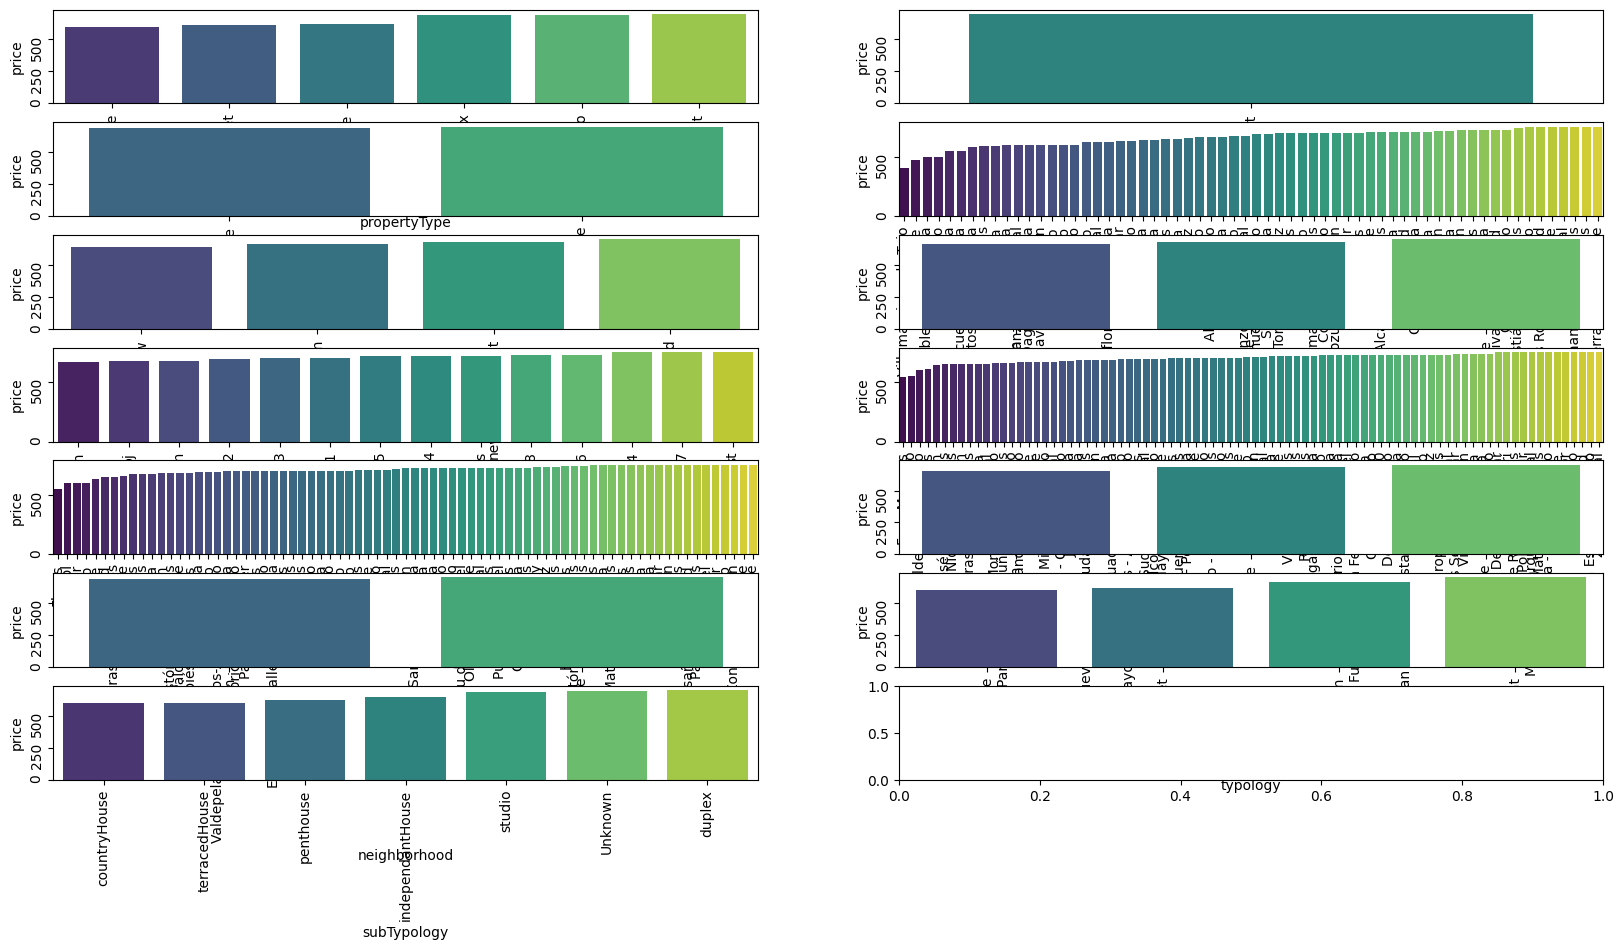

In [7]:
# llamamos al método para hacer las gráficas
analisis_encoding.crear_barplot()

**Se observa que todas las variables categóricas, al ser contrastadas con la variable respuesta, muestran variaciones en sus magnitudes. Esta observación sugiere la posibilidad de una estructura ordenada en las variables.**

In [8]:
#instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = spc.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    #asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    # test = spc.TestEstadisticos(df, "price", categoria)
    # test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.

###########################

Estamos analizando la variable OPERATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.

###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.

###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.

###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.

###########################

Estamos analizando la variable NEWDEVELOPMENT
Para la columna price, los datos no siguen una distribución n

In [9]:
diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : [],
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "target": lista_col_categ}


In [10]:
encoding = spc.Encoding(df, diccionario_encoding, "price")
df_target_enconding = encoding.target_encoding()
df_target_enconding.head()

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea
0,750.0,697.559567,692.932011,60.0,694.964912,1,1,705.594114,695.243827,694.904908,697.689843,701.253737,700.317911,702.252872,691.040741,695.226866,696.600707,13.000000
1,750.0,697.559567,692.932011,70.0,694.964912,2,1,701.418584,695.243827,694.904908,678.664014,700.208637,679.793298,687.633544,691.040741,695.226866,696.600707,11.000000
2,400.0,673.290678,692.932011,67.0,694.964912,2,2,654.819074,695.243827,694.904908,696.092223,645.657771,679.793298,687.633544,691.040741,695.226866,673.290678,6.000000
3,590.0,697.559567,692.932011,70.0,694.964912,3,2,679.539684,695.243827,694.904908,670.416613,645.657771,679.793298,687.633544,691.040741,695.226866,696.600707,8.000000
4,684.0,689.814572,692.932011,45.0,694.964912,0,1,705.594114,682.123310,682.123310,670.416613,645.657771,679.793298,673.705516,691.040741,682.123310,696.600707,13.294985


In [11]:
df_target_enconding.shape[0]

353

In [12]:
df_target_enconding.to_csv("../data/api_rent_madrid_extract_sin_nulos_enconding.csv", sep=";")